In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
img = cv2.imread('PISA.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.imshow(img, 'gray')
# plt.show()

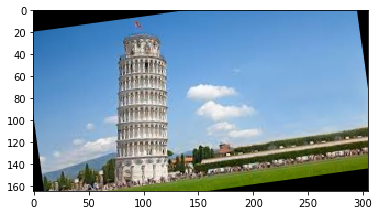

In [4]:
# Inbuilt for rotation
rows, cols = img.shape[:2]

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
M = cv2.getRotationMatrix2D((cols/2, rows/2), 8, 1)#1 is scale
img2 = cv2.warpAffine(img1, M, (cols, rows))


plt.imshow(img2, 'gray')
plt.show()

In [5]:
# Rotating directly with sine and cosine transformations
angle = 8

angle=math.radians(angle)
cosine=math.cos(angle)
sine=math.sin(angle)


height, width = img.shape[:2]

print(height, width, img.shape[2])

rotated=np.zeros([height, width, img.shape[2]],dtype=np.uint8)

for i in range(height):
    for j in range(width):
        x = int(i*cosine - j*sine)
        y = int(i*sine + j*cosine)
        if(x<height and y<width):
            rotated[x, y, :] = img[i, j, :]
            

img1 = rotated
for i in range(width):
    for j in range(height):
        if img1[j,i,0]==0 and img1[j,i,1]==0 and img1[j,i,2]==0:
            if j<height-1 and i<width-1 and j>1 and i>1:
                img1[j,i,0]=(img1[j+1,i,0]+img1[j-1,i,0]+img1[j,i+1,0]+img1[j,i-1,0])/4
                img1[j,i,1]=(img1[j+1,i,1]+img1[j-1,i,1]+img1[j,i+1,1]+img1[j,i-1,1])/4
                img1[j,i,2]=(img1[j+1,i,2]+img1[j-1,i,2]+img1[j,i+1,2]+img1[j,i-1,2])/4
                
                
cv2.imwrite('Normal.jpg', img1)
        



165 305 3


C:\Users\rammo\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\rammo\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\rammo\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in ubyte_scalars


True

In [6]:
# Rotating by converting PCS into ICS


image = cv2.imread("PISA.jpg")
angle=8
r_angle=angle

angle=math.radians(angle)
cosine=math.cos(angle)
sine=math.sin(angle)
height=image.shape[0]
width=image.shape[1]


new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

# print(new_height, new_width)

output=np.zeros((new_height,new_width,image.shape[2]))


original_centre_height   = round(((image.shape[0]+1)/2)-1)
original_centre_width    = round(((image.shape[1]+1)/2)-1)


new_centre_height= round(((new_height+1)/2))
new_centre_width= round(((new_width+1)/2))

print(original_centre_height, original_centre_width)

for i in range(height):
    for j in range(width):
        
        y=image.shape[0]-1-i-original_centre_height
        x=image.shape[1]-1-j-original_centre_width
        

        new_y=round(-x*sine+y*cosine)
        new_x=round(x*cosine+y*sine)
        
#         print("A ", new_y, new_x)

        
#         transformed locationf of x,y wrt to new image() = center of new image-transformed loaction of point (x, y)
        new_y=new_centre_height-new_y
        new_x=new_centre_width-new_x
        
#         print(new_y, new_x)
 
        if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
            output[new_y,new_x,:]=image[i,j,:]

cv2.imwrite("inter.jpg",output)

img=output
height,width,c=img.shape

for i in range(width):
    for j in range(height):
        if img[j,i,0]==0 and img[j,i,1]==0 and img[j,i,2]==0:
            if j<height -1 and i<width -1 and j>1 and i>1:

                img[j,i,0]=(img[j+1,i,0]+img[j-1,i,0]+img[j,i+1,0]+img[j,i-1,0])/4
                img[j,i,1]=(img[j+1,i,1]+img[j-1,i,1]+img[j,i+1,1]+img[j,i-1,1])/4
                img[j,i,2]=(img[j+1,i,2]+img[j-1,i,2]+img[j,i+1,2]+img[j,i-1,2])/4
cv2.imwrite("Rotated_Pisa.png",img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img, 'gray')
# plt.show()

82 152


True

In [7]:
output_img = np.zeros((image.shape[0], image.shape[1], image.shape[2]))
# 200, 200 300, 300
start_x = int((img.shape[0] - image.shape[0])/2)
start_y = int((img.shape[1] - image.shape[1])/2)

output_image = img[start_x : img.shape[0]-start_x, start_y:img.shape[1]-start_y, :]

cv2.imwrite('FINAL.jpg', output_image)

True